# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings("ignore")


# Import Dataset

In [9]:
data=pd.read_csv("Wholesale customers data.csv")

In [10]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
data.shape

(440, 8)

In [12]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [13]:
data['Region'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
data['Channel'].unique()

array([2, 1], dtype=int64)

In [15]:
data.drop(['Region','Channel'],axis=1, inplace=True)

In [16]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Normalize Data

In [17]:
# Standardining The data 
from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()    
data_scaled= scaler.fit_transform(data)    
print(data_scaled) 

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [18]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# Clustering

In [19]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [20]:
kmeans.inertia_

1954.0416346097836

# Finding optimal number of clusters using the elbow method  

k.inertia_  = within cluster sum of square of distance between each point and centroid 
k.labels_   = Cluster number
k.cluster_centers_  = coordinates of centroids

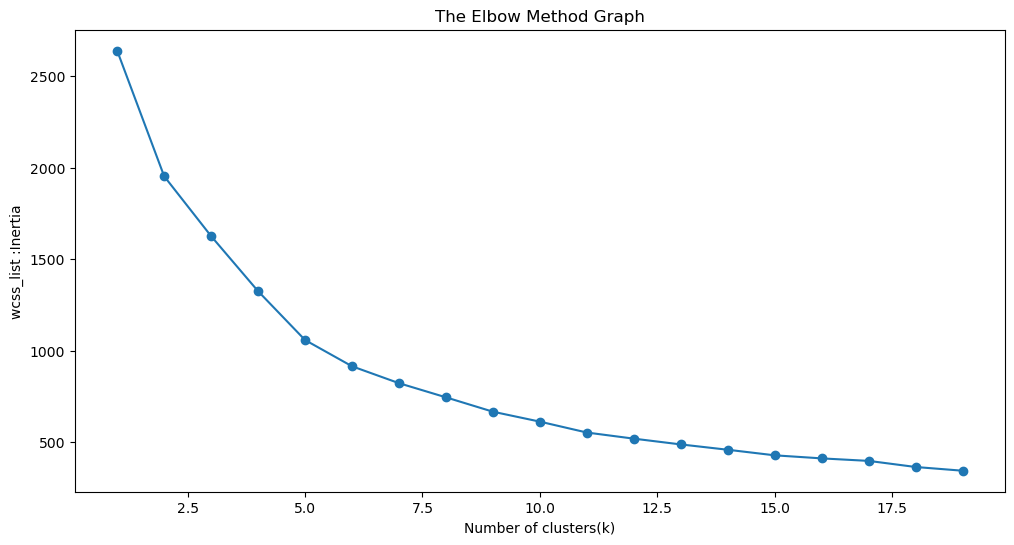

In [21]:
SSE= []   
for cluster in range(1, 20):  
    kmeans = KMeans(n_clusters=cluster)  
    kmeans.fit(data_scaled)  
    SSE.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    
frame=pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})    
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list :Inertia')  
plt.show()  

# Training the K-means model on a dataset  

In [17]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(data_scaled)  
print(kmeans.inertia_)
pred=kmeans.predict(data_scaled)
print(pred)

1059.1497526912442
[0 1 1 0 3 0 0 0 0 1 1 0 3 1 1 0 1 0 0 0 0 0 3 1 1 0 0 0 1 3 0 0 0 3 0 0 3
 1 1 3 3 0 1 1 0 1 1 4 1 1 0 0 3 1 3 0 4 1 0 0 0 4 0 1 0 4 0 1 0 0 3 1 0 3
 0 0 0 1 0 0 0 1 1 0 0 4 4 3 0 3 0 0 4 3 1 0 0 0 0 0 1 1 0 3 0 0 1 1 0 1 0
 1 3 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 1 0 0
 0 3 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 3 0 0 0 0 3 1 2 0
 0 0 0 1 1 0 0 0 1 0 3 3 1 0 0 1 1 3 0 0 1 0 0 0 1 0 4 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 1 1 0 0 0 0 0 4 0 3 1 3 0 0 3
 3 0 0 0 0 1 1 1 0 1 0 0 0 0 3 0 0 3 3 0 0 0 0 3 3 3 3 0 0 0 3 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 3 1 0 0 1 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 1 0
 4 3 3 0 0 0 0 1 1 0 1 0 0 1 3 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 0 0 0 0 1 3 0 0 3 3 3 0 1 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 3 0 0 0 0 3
 1 0 0 0 0 0 3 0 0 1 0 1 0 1 0 0 0 0 3 1 3 0 0 0 3 0 0 0 3 3 1 0 0]


# Assigning label to data

In [18]:
dframe=pd.DataFrame(data)
dframe['cluster']=pred #adding new column named cluster to dataset which contains predicted labels for data points
print(dframe['cluster'].value_counts())
print(dframe)

0    271
1     95
3     63
4     10
2      1
Name: cluster, dtype: int64
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  cluster
0    12669   9656     7561     214              2674        1338        0
1     7057   9810     9568    1762              3293        1776        1
2     6353   8808     7684    2405              3516        7844        1
3    13265   1196     4221    6404               507        1788        0
4    22615   5410     7198    3915              1777        5185        3
..     ...    ...      ...     ...               ...         ...      ...
435  29703  12051    16027   13135               182        2204        3
436  39228   1431      764    4510                93        2346        3
437  14531  15488    30243     437             14841        1867        1
438  10290   1981     2232    1038               168        2125        0
439   2787   1698     2510      65               477          52        0

[440 rows x 7 columns]
